<a href="https://colab.research.google.com/github/SSSSeki/-/blob/master/chapter4/4_Yuting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sre_constants import IN_LOC_IGNORE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import json
import numpy as np


#30
def pos(file_path):
  pos_text = []
  with open(file_path,'r',encoding='utf8')as fp:
      json_data = json.load(fp)
      sentences = json_data['sentences']
      
      i = 0
      j = 0
      
      while i < len(sentences):
        pos_sen = []
        sentence = sentences[i]['tokens']

        while j < len(sentence):
          pos = {}
          pos['word'] = sentence[j].get('word')
          pos['lemma'] = sentence[j].get('lemma')
          pos['pos'] = sentence[j].get('pos')
          pos_sen.append(pos)
          j += 1
        j=0
        pos_text.append(pos_sen)
        i += 1  

  for i in range(0,10):
    print(pos_text[i])
    print('\n')
  return pos_text

pos_text = pos("/content/alice.txt.json")

[{'word': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'}, {'word': "'S", 'lemma': "'s", 'pos': 'POS'}, {'word': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'}, {'word': 'IN', 'lemma': 'in', 'pos': 'IN'}, {'word': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'}]


[{'word': 'Lewis', 'lemma': 'Lewis', 'pos': 'NNP'}, {'word': 'Carroll', 'lemma': 'Carroll', 'pos': 'NNP'}]


[{'word': 'THE', 'lemma': 'the', 'pos': 'DT'}, {'word': 'MILLENNIUM', 'lemma': 'MILLENNIUM', 'pos': 'NNP'}, {'word': 'FULCRUM', 'lemma': 'FULCRUM', 'pos': 'NNP'}, {'word': 'EDITION', 'lemma': 'EDITION', 'pos': 'NNP'}, {'word': '3.0', 'lemma': '3.0', 'pos': 'CD'}]


[{'word': 'CHAPTER', 'lemma': 'chapter', 'pos': 'NN'}, {'word': 'I.', 'lemma': 'i.', 'pos': 'NN'}, {'word': 'Down', 'lemma': 'down', 'pos': 'IN'}, {'word': 'the', 'lemma': 'the', 'pos': 'DT'}, {'word': 'Rabbit-Hole', 'lemma': 'Rabbit-Hole', 'pos': 'NNP'}]


[{'word': 'Alice', 'lemma': 'Alice', 'pos': 'NNP'}, {'word': 'was', 'lemma': 'be', 'pos': 'VBD'}, {'wo

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['words','lemma','pos_tag'])
import re

#31#32
def dataframe():
  words = []
  pos_tag = []
  lemma = []
  for sentence in pos_text:
    for element in sentence:
        words.append(element['word'])
        lemma.append(element['lemma'])
        pos_tag.append(element['pos'])
  df['words'] = words
  df['lemma'] = lemma
  df['pos_tag'] = pos_tag

  drop_index = df.index[(df['pos_tag'] != 'VB') &(df['pos_tag'] != 'VBD') &(df['pos_tag'] != 'VBN') &(df['pos_tag'] != 'VBP') &(df['pos_tag'] != 'VBZ')]
  df_verb = df.drop(drop_index)
  print(df_verb[['words']])
  print(df_verb[['lemma']])
  return df

df_verb = dataframe()

        words
18        was
21        get
38         do
44        had
45     peeped
...       ...
34368    keep
34389  gather
34397    make
34424    feel
34432    find

[5120 rows x 1 columns]
        lemma
18         be
21        get
38         do
44       have
45       peep
...       ...
34368    keep
34389  gather
34397    make
34424    feel
34432    find

[5120 rows x 1 columns]


In [ ]:
#33
of_list = []

for sen in pos_text:     
  for i in range(1,len(sen)-1):
    #print(sen[i]['word'])
    if sen[i-1]['pos']==('NNP'or'NN') and sen[i]['lemma']=='of' and sen[i+1]['pos']==('NNP'or'NN'):
      of_list.append(sen[i - 1]['word'] +' '+ sen[i]['lemma'] + ' ' + sen[i + 1]['word'])
print(of_list) 

['OUT of ITS']


In [ ]:
#34


with stop words

,      2418
the    1639
'      1130
`      1081
be     1076
.       986
and     866
she     794
to      725
a       688
Name: lemma, dtype: int64


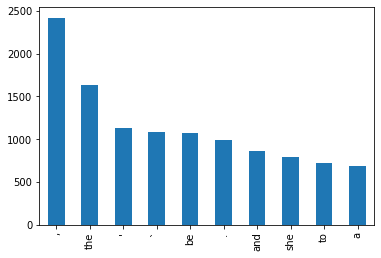

In [ ]:
+#35#36
#with stop words
print("with stop words\n")
def word_frequency_sw():
  #print(df['lemma'].value_counts())
  top_ten = df['lemma'].value_counts().head(10)
  print(top_ten)
  top_ten.plot.bar()
word_frequency_sw()



without stop words

say       532
alice     398
--        264
go        179
think     133
little    128
would     122
get       113
know      107
one       105
dtype: int64


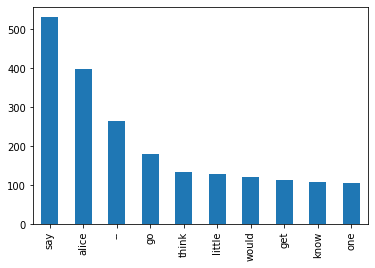

In [ ]:
#35#36
#without stop words
print("\nwithout stop words\n")
import nltk
from string import punctuation

#nltk.download('stopwords')
stop_words = stopwords.words('english')

df_words_nsw = pd.Series()
def word_frequency():
  words = []
  words = df['lemma']
  words_nsw  = []
  for word in words:
    word = word.lower()
    if (word not in stop_words)&(word not in punctuation):
      words_nsw.append(word)
      df_words_nsw = pd.Series(words_nsw)
  #print(df_words_nsw.value_counts())
  top_ten_nsw = df_words_nsw.value_counts().head(10)
  print(top_ten_nsw)
  top_ten_nsw.plot.bar()
word_frequency()

     groupnum  lemma_counts
0           1          1481
1           2           487
2           3           247
3           4           161
4           5           112
..        ...           ...
117       986             1
118      1081             1
119      1127             1
120      1639             1
121      2418             1

[122 rows x 2 columns]


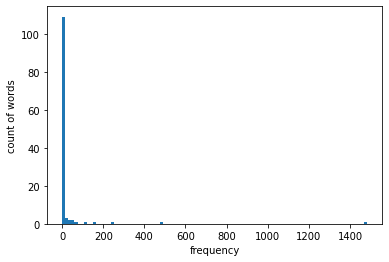

In [91]:
from numpy.lib.shape_base import column_stack
from pandas.core.base import duplicated
import matplotlib.pyplot as plt

#38 I dont entirely understand what the exercise means 
df_value= df[['lemma','pos_tag']].value_counts().reset_index()  #index reset
df_value.columns = ['lemma', 'pos_tag','counts'] 
df_value_grouped = df_value[['counts','lemma']].groupby(['counts'],as_index=False) #as_index=false

groups = df_value_grouped.count()    #generate a table for counts and pos_tag
groups.reset_index()
groups.columns = ['groupnum','lemma_counts']
print(groups)

plt.hist(groups['lemma_counts'], bins=100)
plt.xlabel('frequency')
plt.ylabel('count of words')
plt.show()

In [ ]:
#39 